## Example 9.6: Solve the problem:

$ \frac{ \mathrm{d^2} \phi}{ \mathrm{d}r^2} = -4 \pi r \rho$, 

for $\rho(r) = \frac{1}{8\pi} e^{-r}$ using the Green's function method. 

Compare your results to the exact solution by plotting the error as in the previous examples. 

Solution: 

The two solutions to the homogeneous equation (RHS=0) are given by: 

$\phi_< (r) = r$ and $\phi_> (r) = - 1$, obtained by setting $\ell=0$ in the homogeneous solutions for arbitrary $\ell$. 

The solution to the boundary value problem is then given by:

$\phi(r) = \phi_> (r) \int_0^r \phi_< (r') S(r') \mathrm{d}r' + \phi_< (r) \int_r^\infty \phi_> (r') S(r') \mathrm{d}x'$, 

with $S(r') = -\frac{1}{2} r' e^{-r'}$. 

We can perform the integration for arbitrary $r$ using one of the standard rules. Here we will simply use SciPy's ```scipy.integrate.quad```.

In [6]:
import scipy
import numpy as np

# implement the S(r) function
def Sfunc(r):
    """The source term S(r) corresponding to the differential equation"""
    return - 0.5 * r * np.exp(-r)

# implement the phi_< and phi_> functions:
def phi_l(r):
    """The lower solution to the homogeneous equation (ell=0)"""
    return r

def phi_u(r):
    """The upper solution to the homogeneous equation (ell=0)"""
    return -1
    
# implement the Green's function method for arbitrary r:
def GreenSolve(r):
    """Implements the Green's function method to solve the differential equation"""
    # the first term in phi(r):
    phi1 = phi_u(r) * scipy.integrate.quad(lambda rp: phi_l(rp)*Sfunc(rp), 0, r)[0]
    # the second term in phi(r):
    phi2 = phi_l(r) * scipy.integrate.quad(lambda rp: phi_u(rp)*Sfunc(rp), r, 100)[0]
    # return the sum:
    return phi1+phi2

# the exact solution
def phiexact(r):
    """The exact solution to the Poisson equation for Example 9.2"""
    return 1 - 0.5 * (r + 2) * np.exp(-r)

# the next line "vectorizes" the above function. 
# This is simply for convenience:
# If you don't want to use this, simply loop over the array of r's and append the result to a list
vGreenSolve = np.vectorize(GreenSolve)

# Get the result at values of r from 0 to 20:
ra = np.linspace(0,20,200)
phi = vGreenSolve(ra)

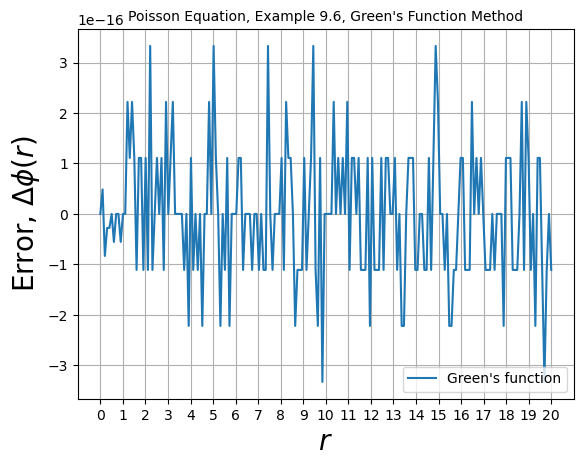

In [7]:
# Let's plot:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
from math import pi
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$r$', fontsize=20) # set the x label
ax.set_ylabel(r'Error, $\Delta \phi(r)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title("Poisson Equation, Example 9.6, Green's Function Method", fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(ra, phi-phiexact(ra), label="Green's function") 
#ax.plot(ra, phiexact(ra), label="Exact") 
#-phiexact(ra)

# set the ticks
ax.set_xticks(range(21))
ax.grid()

# construct the legend:
ax.legend(loc='lower right')  # Add a legend

plt.show() # show the plot here